<a href="https://colab.research.google.com/github/Jucavilav/Ciencia-de-datos/blob/Taller1/JuanCarlosAvila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
- MINE-4101: Applied Data Science
- Univerisdad de los Andes
- Dataset: AirBnb Listings Madrid
- Last update: September, 2023
- Juan Carlos Avila Villalba

In [ ]:
!pip install umap-learn

In [ ]:
pip install pandas

In [6]:
! git clone https://github.com/Jucavilav/Ciencia-de-datos.git

Cloning into 'Ciencia-de-datos'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 74 (delta 29), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (74/74), 13.83 MiB | 18.34 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [7]:
pd.__version__

'1.5.3'

### 1. Carga de datos

In [8]:
listings_df = pd.read_csv("/content/Ciencia-de-datos/datos/listings.csv.gz")

In [51]:
# Mostrando dimensiones del marco de datos
listings_df.shape

(23524, 75)

In [9]:
# Mostrando tipos de columnas
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [10]:
listings_df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
16572,669993599747679077,https://www.airbnb.com/rooms/669993599747679077,20230610002006,2023-06-10,city scrape,Rental unit in Madrid · 2 bedrooms · 3 beds · ...,Our mission is to empower individuals to immer...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,346367515,https://www.airbnb.com/users/show/346367515,Ukio,2020-05-15,"Barcelona, Spain",Ukio's mission is to empower individuals to li...,within an hour,98%,100%,f,https://a0.muscache.com/im/pictures/user/f790e...,https://a0.muscache.com/im/pictures/user/f790e...,NaN,448.0,454.0,"['phone', 'work_email']",t,t,NaN,Goya,Salamanca,40.427250,-3.668520,Entire rental unit,Entire home/apt,4,NaN,2 baths,2.0,3.0,"[""Elevator"", ""Oven"", ""Kitchen"", ""Toaster"", ""Wi...",$147.00,31,365,31,31,365,365,31.0,365.0,NaN,t,6,36,66,306,2023-06-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,172,172,0,0,NaN
19509,798531771525681972,https://www.airbnb.com/rooms/798531771525681972,20230610002006,2023-06-10,city scrape,Hotel in Madrid · ★4.71 · 1 bedroom · 1 bed · ...,"Nuestras instalaciones combinan diseño, modern...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,432147758,https://www.airbnb.com/users/show/432147758,Hostal Siesta And Go,2021-11-16,"Madrid, Spain",Hostal Siesta & Go,within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/7df66...,https://a0.muscache.com/im/pictures/user/7df66...,NaN,25.0,25.0,"['email', 'phone']",t,t,NaN,Cuatro Caminos,Tetuán,40.449674,-3.695415,Shared room in hotel,Shared room,1,NaN,3 shared baths,NaN,1.0,"[""Iron"", ""Shower gel"", ""Bed linens"", ""Security...",$16.00,1,365,1,1,365,365,1.0,365.0,NaN,t,3,12,37,101,2023-06-10,7,7,1,2023-01-19,2023-05-19,4.71,4.71,4.86,4.57,4.86,4.71,4.71,NaN,t,25,0,7,18,1.47
10965,44447193,https://www.airbnb.com/rooms/44447193,20230610002006,2023-06-10,previous scrape,Rental unit in Madrid · 1 bedroom · 1 shared bath,"Near by metro 10 Batan and 6 Lucero, restrau...",NaN,https://a0.muscache.com/pictures/d07707cf-b383...,97733202,https://www.airbnb.com/users/show/97733202,Daniel,2016-10-03,NaN,Keel Calm and Enjoy Madrid,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/fcdbd...,https://a0.muscache.com/im/pictures/user/fcdbd...,NaN,1.0,1.0,['phone'],t,t,NaN,Lucero,Latina,40.405720,-3.752660,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,NaN,"[""Iron"", ""Elevator"", ""Lock on bedroom door"", ""...",$90.00,60,90,60,60,1125,1125,60.0,1125.0,NaN,t,0,0,0,0,2023-06-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
5915,27187208,https://www.airbnb.com/rooms/27187208,20230610002006,2023-06-10,city scrape,Rental unit in Madrid · ★4.0 · 1 bedroom · 1 b...,"KINZALATINA, est

## 2. Análisis univariado

In [11]:
# Mostrando el número de valores únicos de los ID de listado (Saber si hay duplicados)
listings_df["id"].nunique() # De acuerdo al resultado no hay registros duplicados

23524

In [12]:
# Mostrando valores únicos de los barrios.
listings_df["neighbourhood_cleansed"].unique()

array(['Hispanoamérica', 'Cármenes', 'Universidad', 'Legazpi',
       'Argüelles', 'Sol', 'Embajadores', 'Justicia', 'Goya', 'Recoletos',
       'Palacio', 'Valverde', 'Pueblo Nuevo', 'Almagro', 'Rios Rosas',
       'Los Angeles', 'Trafalgar', 'Piovera', 'Castellana', 'Cortes',
       'Canillas', 'Arapiles', 'Opañel', 'Chopera', 'Valdefuentes',
       'Delicias', 'Almenara', 'Fuente del Berro', 'Niño Jesús',
       'Acacias', 'Lista', 'Comillas', 'La Paz', 'Rosas', 'Jerónimos',
       'Concepción', 'Puerta del Angel', 'Arcos', 'Pacífico', 'Ibiza',
       'Cuatro Caminos', 'Casco Histórico de Barajas', 'San Fermín',
       'Palos de Moguer', 'Berruguete', 'Lucero', 'San Diego',
       'Prosperidad', 'Castilla', 'Casco Histórico de Vallecas',
       'Puerta Bonita', 'Pinar del Rey', 'Costillares', 'El Viso',
       'Alameda de Osuna', 'Castillejos', 'Rejas', 'Simancas', 'Timón',
       'Salvador', 'Numancia', 'Ciudad Universitaria', 'Marroquina',
       'Gaztambide', 'Palomeras Sureste',

In [13]:
listings_df["neighbourhood_cleansed"].nunique() #Total de barrios

126

In [14]:
# Calcular la frecuencia relativa de los tipos de habitaciones.
listings_df["room_type"].value_counts(dropna=False, normalize=True)

Entire home/apt    0.632248
Private room       0.349388
Shared room        0.013093
Hotel room         0.005271
Name: room_type, dtype: float64

In [15]:
# Calcular estadísticas básicas de acomodaciones
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    23524.000000
mean         3.115287
std          1.939038
min          0.000000
5%           1.000000
25%          2.000000
50%          2.000000
75%          4.000000
95%          6.000000
max         16.000000
Name: accommodates, dtype: float64

In [16]:
# Transformacio del atributo precio
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

[]

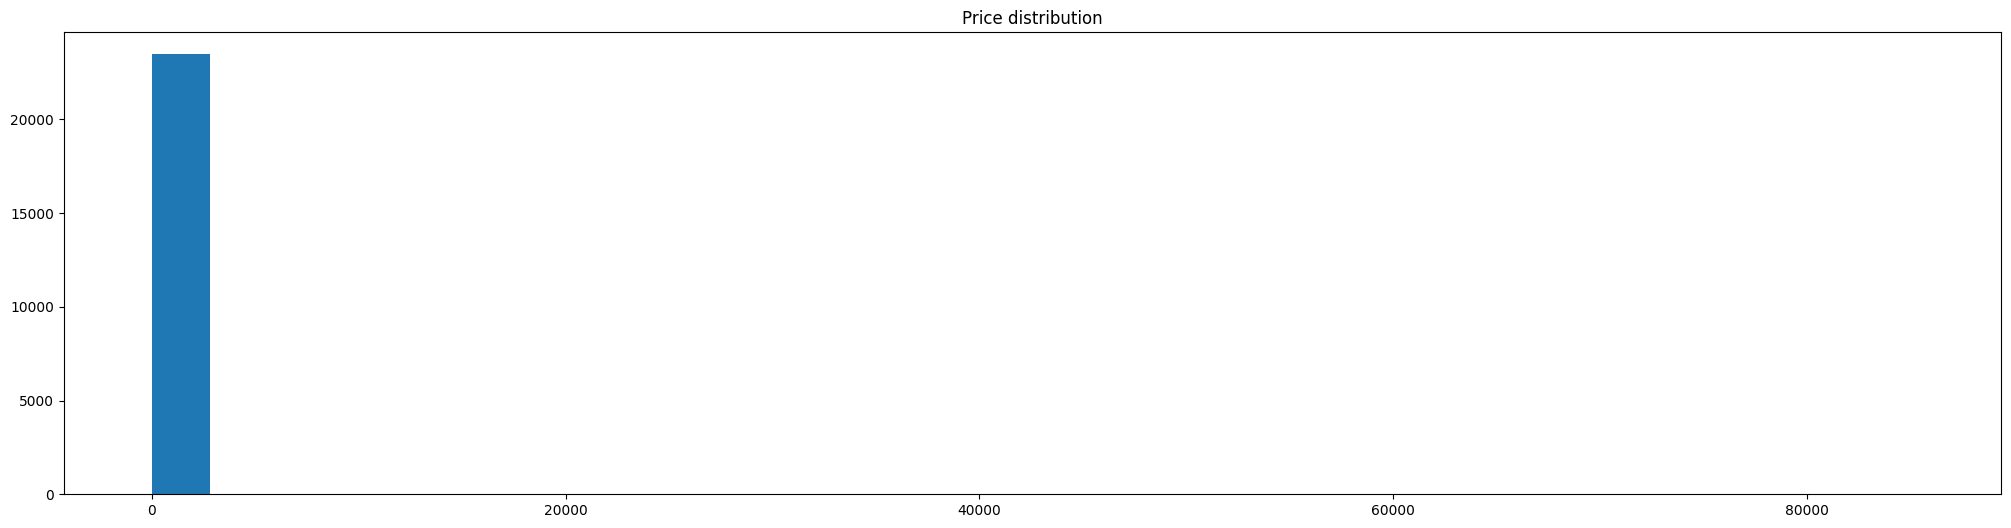

In [29]:
# Histograma de precio
plt.figure(figsize=(25, 6))
plt.hist(listings_df["price_float"], bins=30)
plt.title("Price distribution")
plt.plot()

In [30]:
# Cálculos para determinar en un umbral de valor atípico
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

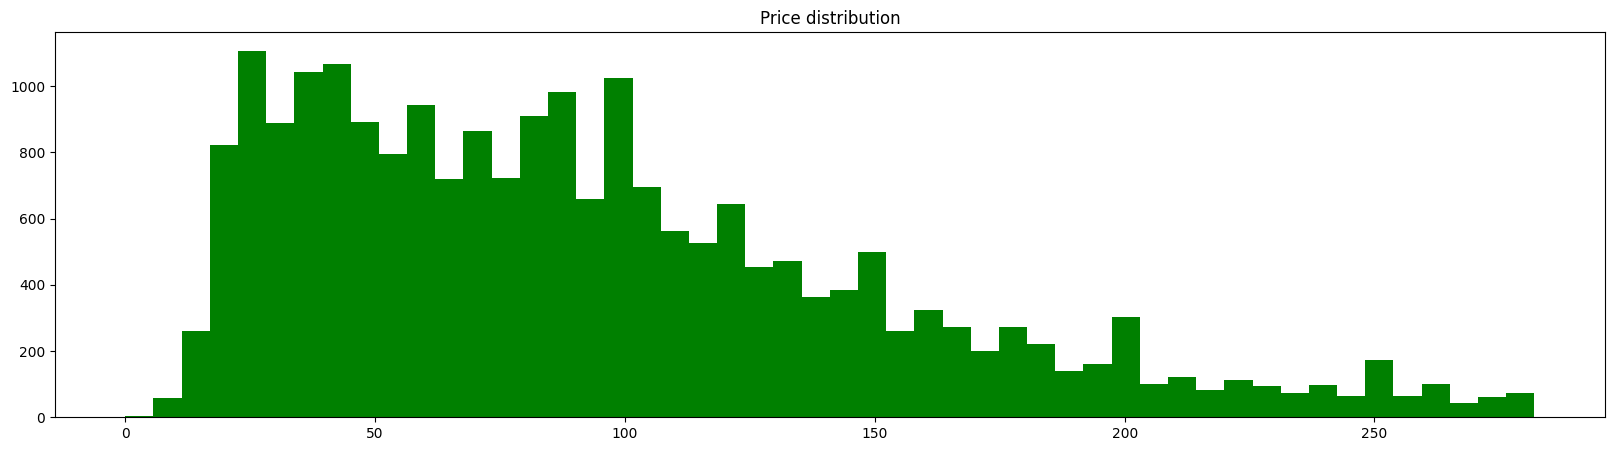

In [40]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50, color='green')
plt.title("Price distribution")
plt.plot()

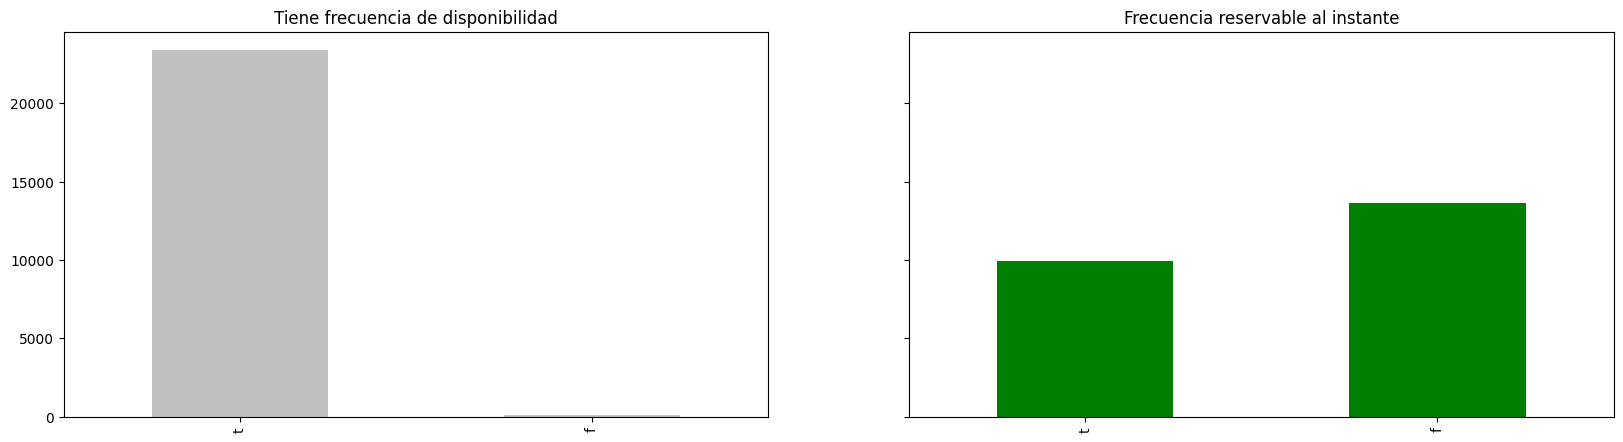

In [37]:
# Gráficos para disponibilidad y reserva instantánea
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="silver")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Tiene frecuencia de disponibilidad")
ax2.set_title("Frecuencia reservable al instante")
plt.show()

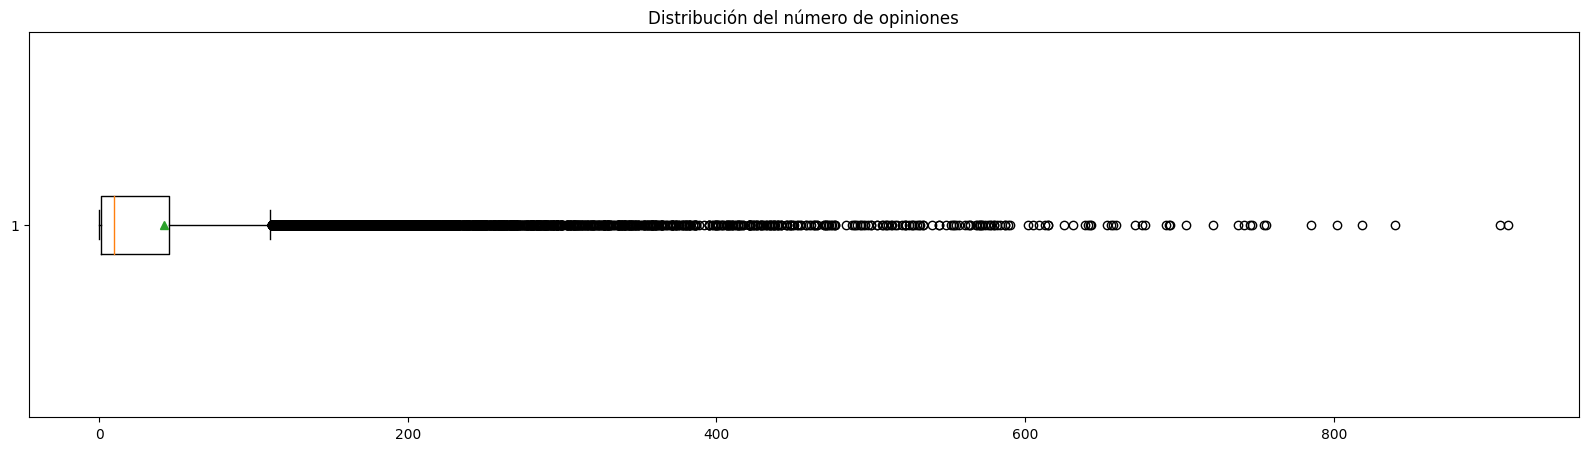

In [43]:
# Diagrama para el número de opiniones
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Distribución del número de opiniones")
plt.show()

## 2. Bivariate analysis